In [11]:
!pip install numpy
!pip install pandas
!pip install openpyxl
!pip install scipy
!pip install scikit-learn
!pip install matplotlib

Loading data from file: FEHDataStudent.xlsx
Loaded 592 rows of data.
R-squared Accuracy: 0.7848


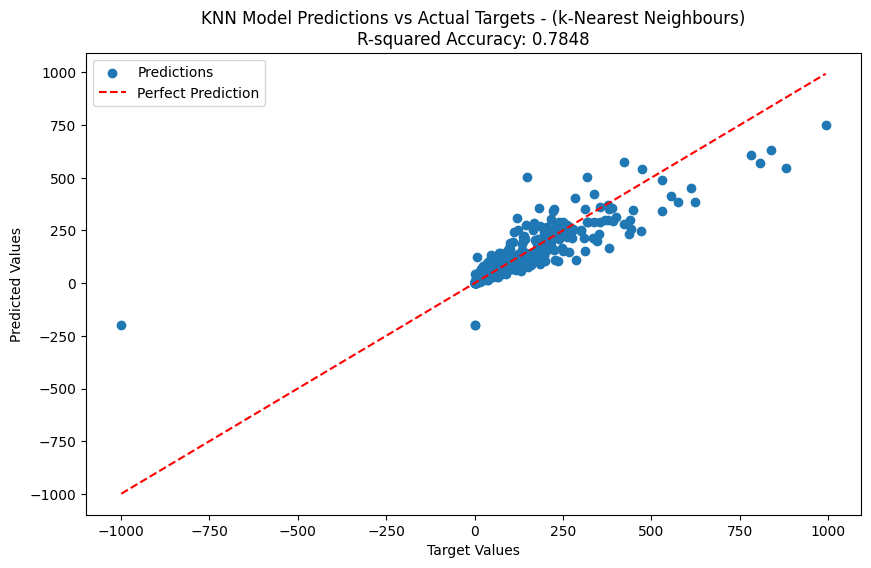

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load and preprocess data from an Excel file
def loadDataFromExcel(filePath, inputColNames, targetColName):
    print(f"Loading data from file: {filePath}")
    df = pd.read_excel(filePath)
    df = df[inputColNames + [targetColName]].dropna()
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    inputs = df[inputColNames].values
    targets = df[[targetColName]].values
    if inputs.shape[0] == 0 or targets.shape[0] == 0:
        print("No valid data found.")
        return np.array([]), np.array([])
    print(f"Loaded {len(inputs)} rows of data.")
    return inputs, targets

if __name__ == "__main__":
    # Specify the file path and column names
    filePath = 'FEHDataStudent.xlsx'
    inputColumnNames = ['AREA', 'BFIHOST', 'FARL', 'FPEXT', 'LDP', 'PROPWET', 'RMED-1D', 'SAAR']
    targetColumnName = 'Index flood'

    # Load data from Excel
    inputs, targets = loadDataFromExcel(filePath, inputColumnNames, targetColumnName)

    # Normalize input and target
    scalerInput = StandardScaler()
    scalerTarget = StandardScaler()
    inputsNormalised = scalerInput.fit_transform(inputs)
    targetsNormalised = scalerTarget.fit_transform(targets)

    # Create and train KNN model
    k_value = 5  # Set the number of neighbors (you can adjust this)
    knn_model = KNeighborsRegressor(n_neighbors=k_value)
    knn_model.fit(inputsNormalised, targetsNormalised)

    # Make predictions
    predictionsNormalised = knn_model.predict(inputsNormalised)
    predictions = scalerTarget.inverse_transform(predictionsNormalised)

    # Calculate R-squared accuracy
    r_squared = r2_score(targets, predictions)
    print(f'R-squared Accuracy: {r_squared:.4f}')

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(targets, predictions, label='Predictions')
    plt.plot([min(targets.flatten()), max(targets.flatten())], [min(targets.flatten()), max(targets.flatten())], '--', color='red', label='Perfect Prediction')
    plt.xlabel('Target Values')
    plt.ylabel('Predicted Values')
    plt.title('KNN Model Predictions vs Actual Targets - (k-Nearest Neighbours)\nR-squared Accuracy: {:.4f}'.format(r_squared))
    plt.legend()
    plt.show()
